# Problem Statement

#### Main aim is to predict the churn in hotel reservation

## Details of Dataset :

***Booking_ID***: unique identifier of each booking

****no_of_adults****: Number of adults

***no_of_children***: Number of Children

***no_of_weekend_nights***: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

***no_of_week_nights***: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

***type_of_meal_plan***: Type of meal plan booked by the customer:

***required_car_parking_space***: Does the customer require a car parking space? (0 - No, 1- Yes)

***room_type_reserved***: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

***lead_time***: Number of days between the date of booking and the arrival date

***arrival_year***: Year of arrival date

***arrival_month***: Month of arrival date

***arrival_date***: Date of the month

***market_segment_type***: Market segment designation.

***repeated_guest***: Is the customer a repeated guest? (0 - No, 1- Yes)

***no_of_previous_cancellations***: Number of previous bookings that were canceled by the customer prior to the current booking

***no_of_previous_bookings_not_canceled***: Number of previous bookings not canceled by the customer prior to the current booking

***avg_price_per_room***: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

***no_of_special_requests***: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

***booking_status***: Flag indicating if the booking was canceled or not.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

#### Loading the CSV File

In [2]:
df= pd.read_csv("Hotel Reservations.csv",index_col=[0])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

##### Finding Shape

In [4]:
df.shape

(36275, 18)

## DATA CLEANING

##### Checking for null values

In [5]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
# Observed no null Values

In [7]:
##### Cheacking for Duplicates in DataFrame

In [8]:
df.duplicated().sum()

10275

In [9]:
## Observed **10275**
# So Dropped Duplicates 

In [10]:
 df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(26000, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, INN00001 to INN36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_seg

In [14]:
df["avg_price_per_room"]=df["avg_price_per_room"].astype(int)

In [15]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94,0,Canceled


# EXPLORATORY DATA ANALYSIS

##### Writing a functions for analysis 


In [17]:
# Distribution of target variable

In [18]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

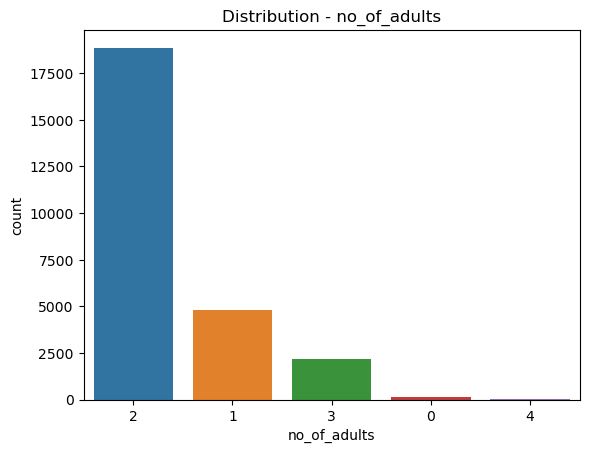

In [19]:
# Distribution of no:of adults

sns.countplot(data =df,x="no_of_adults",order = df['no_of_adults'].value_counts().index)
plt.title("Distribution - no_of_adults")

plt.show()

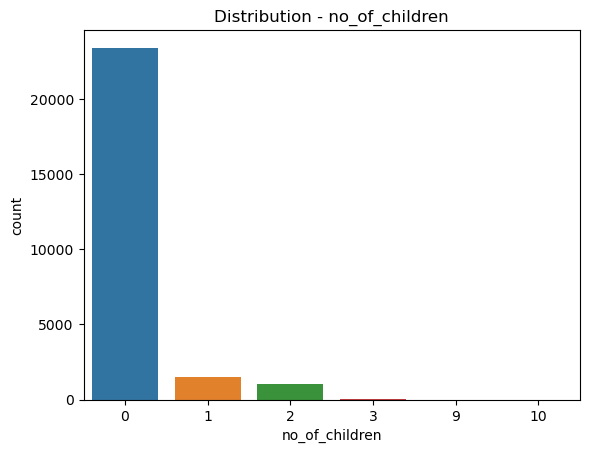

In [20]:
# Distribution of no:of childrens



sns.countplot(data =df,x="no_of_children",order = df['no_of_children'].value_counts().index)
plt.title("Distribution - no_of_children")

plt.show()



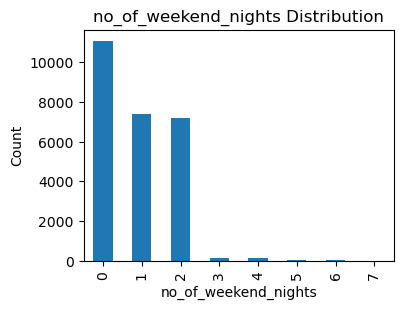

In [21]:
# Distribution of no:of weekend_nights

value_counts =  df["no_of_weekend_nights"].value_counts()

plt.figure(figsize=(4, 3))
value_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('no_of_weekend_nights')
plt.ylabel('Count')
plt.title('no_of_weekend_nights Distribution')

plt.show()

In [22]:
# Distribution of no:of weekend_nights
#uni_viz(df["no_of_weekend_nights"])

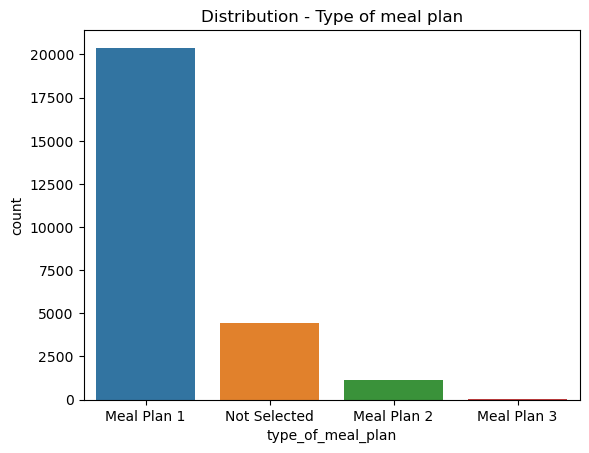

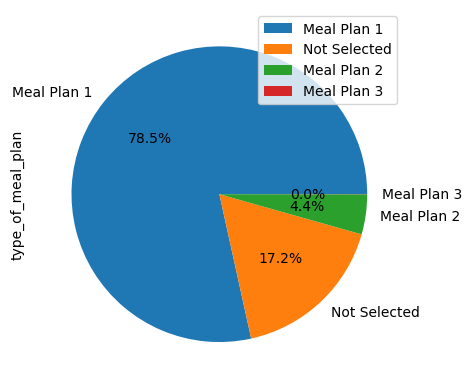

In [23]:
sns.countplot(data =df,x="type_of_meal_plan",order = df['type_of_meal_plan'].value_counts().index)
plt.title("Distribution - Type of meal plan")
plt.show()
df["type_of_meal_plan"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

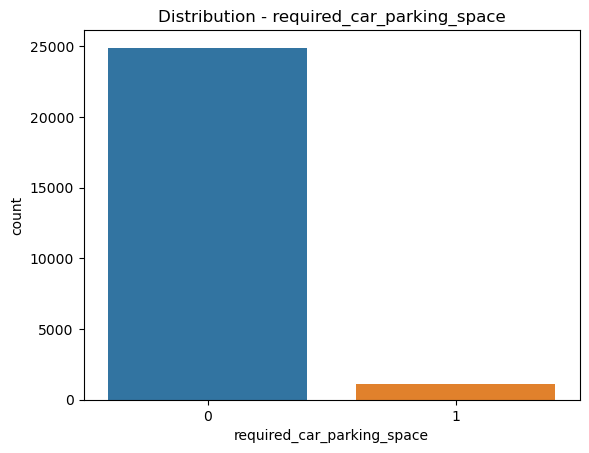

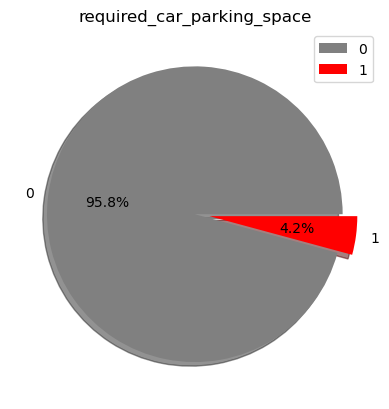

In [24]:
sns.countplot(data =df,x="required_car_parking_space",order = df['required_car_parking_space'].value_counts().index)
plt.title("Distribution - required_car_parking_space")
plt.show()
# Distribution of no_of type_of_meal_plan
parking = df["required_car_parking_space"].value_counts()

colors = ['grey', 'red']
explode = [0, 0.1]

plt.pie(parking, labels=parking.index, colors=colors, explode=explode, shadow=True, autopct='%1.1f%%')

plt.title('required_car_parking_space')
plt.legend(labels=parking.index)

plt.show()


In [25]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

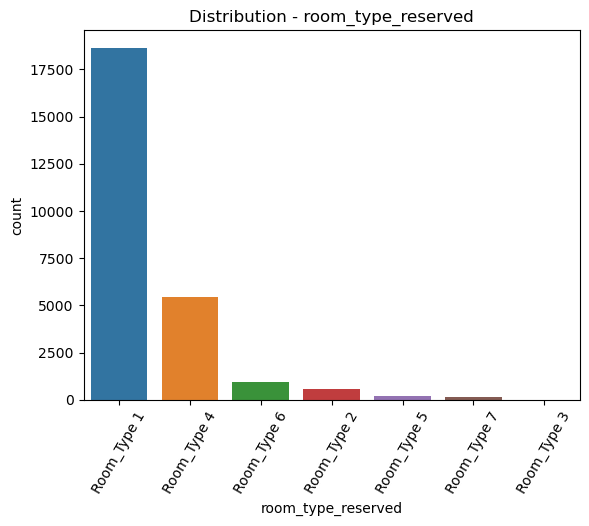

In [26]:
sns.countplot(data =df,x="room_type_reserved",order = df['room_type_reserved'].value_counts().index)
plt.title("Distribution - room_type_reserved")
plt.xticks(rotation=60)
plt.show()

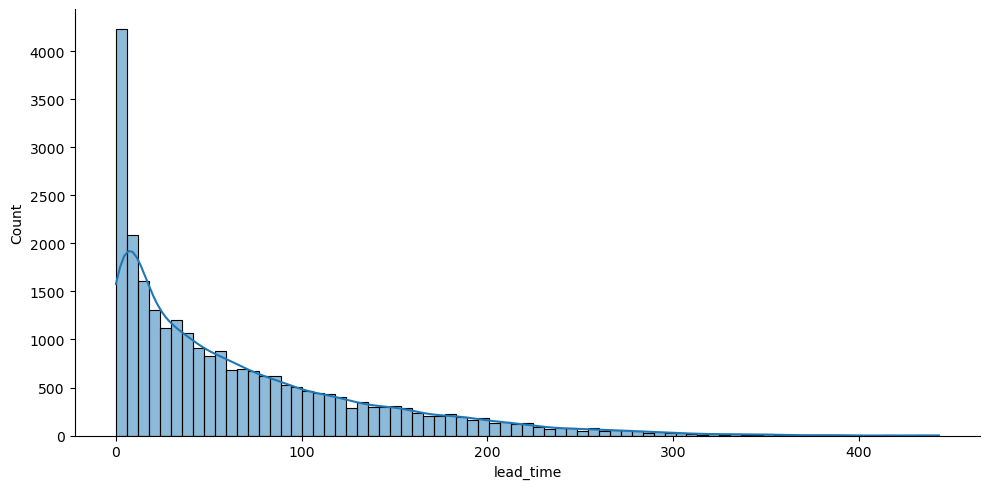

<AxesSubplot:xlabel='lead_time'>

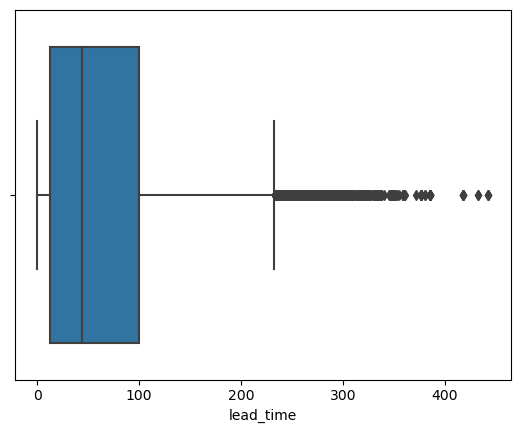

In [27]:
# Distribution of timespent
sns.displot(df["lead_time"],kde = True,height=5, aspect=2)
plt.show()
sns.boxplot(df['lead_time'],  orient='h') 

In [28]:
# Observed there are outliers in leadtime 
# So treating with IQR Meathod
# For 'lead_time' column
# Calculate the quartiles and IQR
Q3 = df['lead_time'].quantile(0.75)
Q1 = df['lead_time'].quantile(0.25)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lf = Q1 - 1.5 * IQR
uf = Q3 + 1.5 * IQR

def replace_outliers(value):
    if value < lf:
        return lf
    elif value > uf:
        return uf
    else:
        return value

# Apply the custom function to the 'lead_time' column
df['lead_time'] = df['lead_time'].apply(replace_outliers)

<AxesSubplot:xlabel='lead_time'>

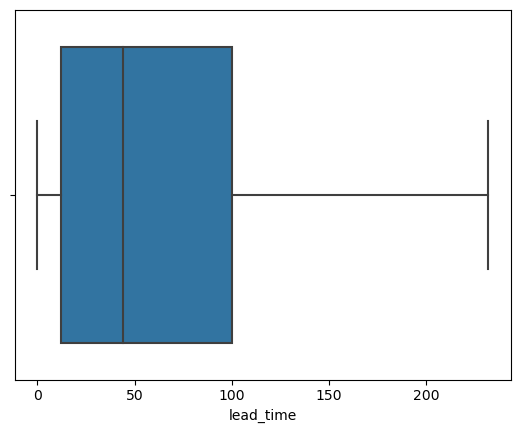

In [29]:
# After Treating outliersBoxplot
sns.boxplot(df['lead_time'],  orient='h') 

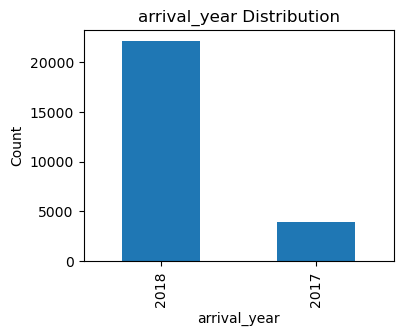

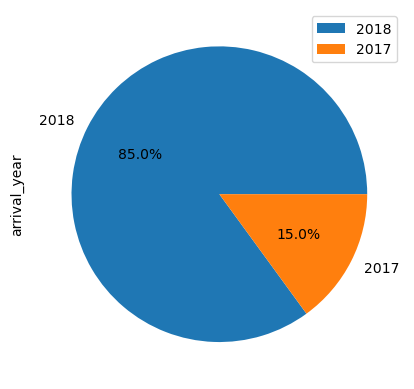

In [30]:
# counts of arrival_year

value_counts =  df["arrival_year"].value_counts()

plt.figure(figsize=(4, 3))
value_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('arrival_year')
plt.ylabel('Count')
plt.title('arrival_year Distribution')

plt.show()
df["arrival_year"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

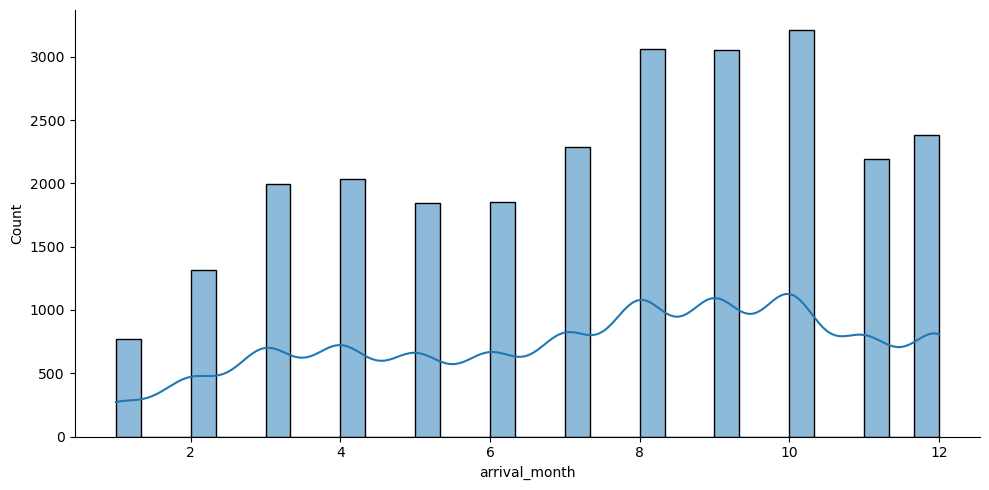

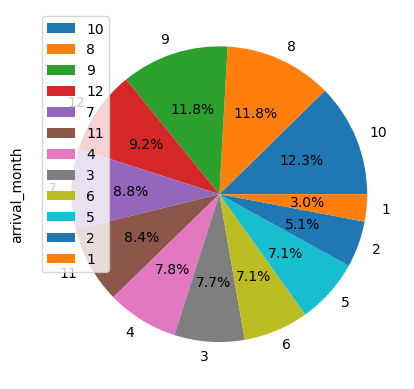

In [31]:

# counts of arrival_month
sns.displot(df["arrival_month"],kde = True,height=5, aspect=2)
plt.show()
df["arrival_month"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

<AxesSubplot:xlabel='arrival_date'>

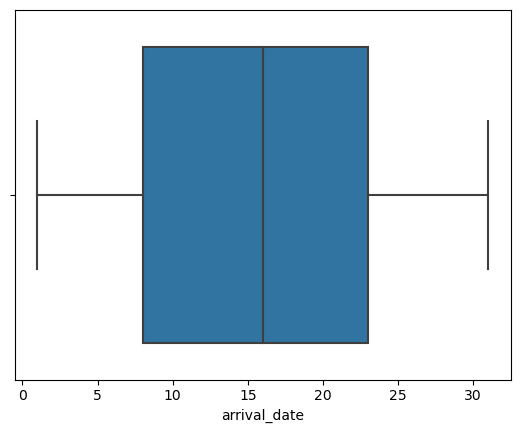

In [32]:
# Box Plot For Arrival Date
sns.boxplot(df['arrival_date'],  orient='h') 

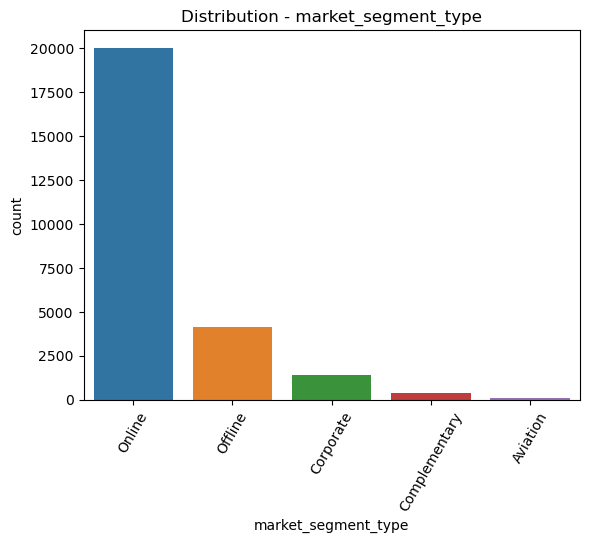

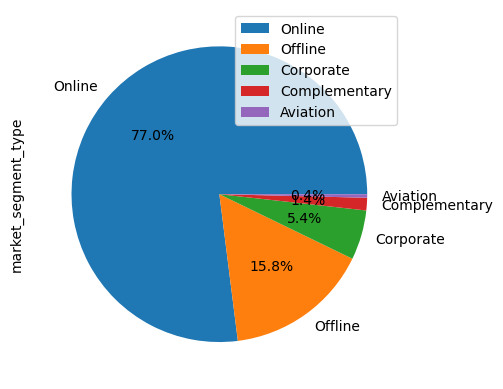

In [33]:


# counts of market_segment_type
sns.countplot(data =df,x="market_segment_type",order = df['market_segment_type'].value_counts().index)
plt.title("Distribution - market_segment_type")
plt.xticks(rotation=60)
plt.show()

df["market_segment_type"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

In [34]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

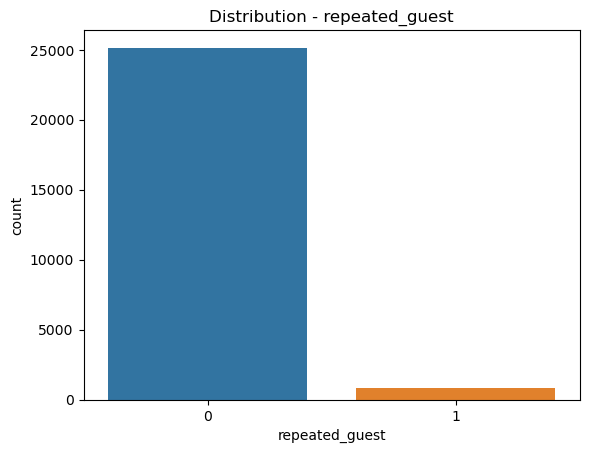

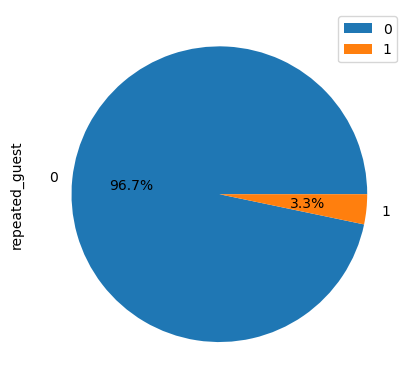

In [35]:



# counts of repeated_guest

sns.countplot(data =df,x="repeated_guest",order = df['repeated_guest'].value_counts().index)
plt.title("Distribution - repeated_guest")
plt.xticks(rotation=0)
plt.show()

df["repeated_guest"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

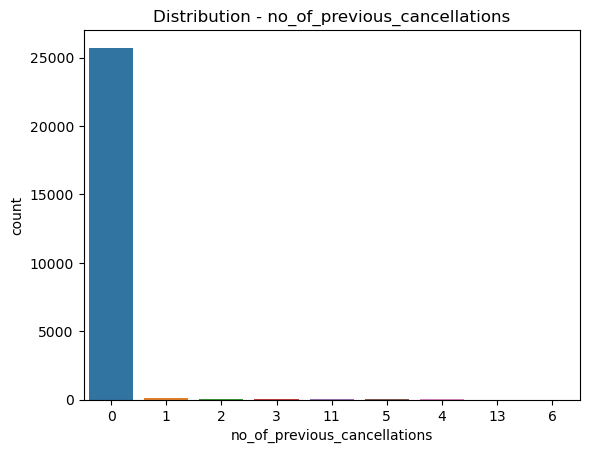

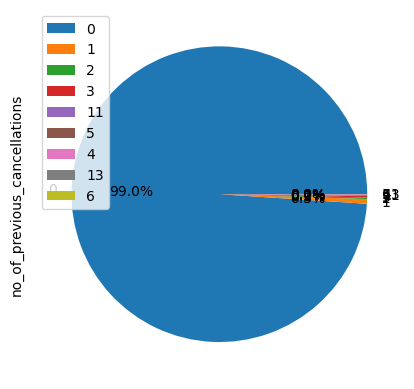

In [36]:



# counts of no_of_previous_cancellations

sns.countplot(data =df,x="no_of_previous_cancellations",order = df['no_of_previous_cancellations'].value_counts().index)
plt.title("Distribution - no_of_previous_cancellations")
plt.xticks(rotation=0)
plt.show()

df["no_of_previous_cancellations"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

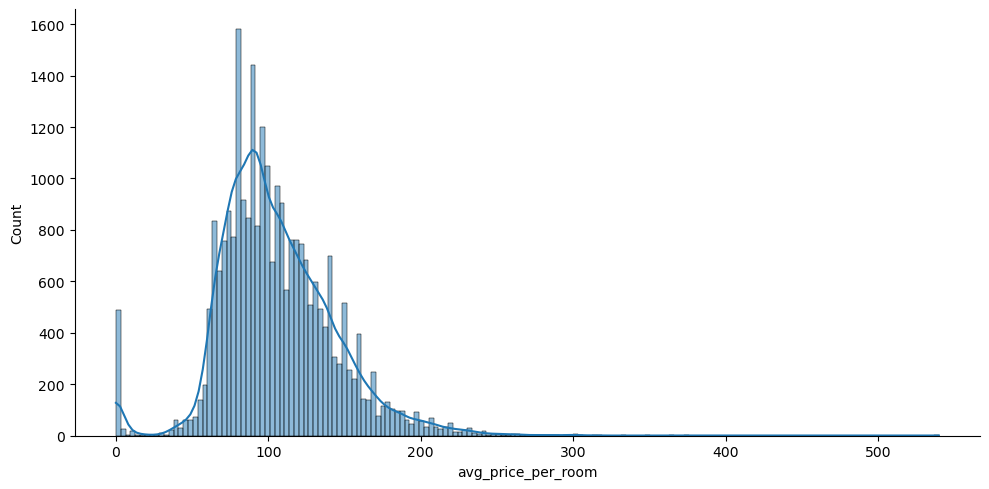

<AxesSubplot:xlabel='avg_price_per_room'>

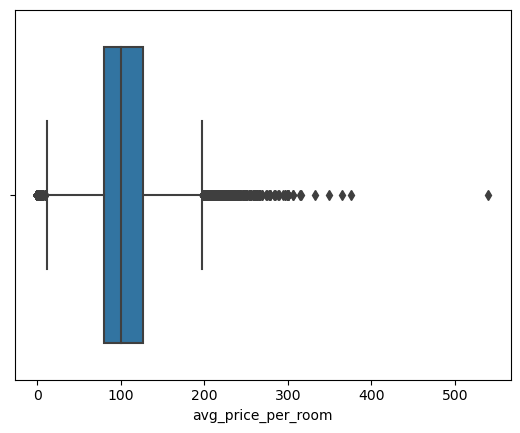

In [37]:
sns.displot(df["avg_price_per_room"],kde = True,height=5, aspect=2)
plt.show()
sns.boxplot(df['avg_price_per_room'],  orient='h')

In [38]:
# Observed there are outliers in Average Price
# Calculate the quartiles and IQR
Q3 = df['avg_price_per_room'].quantile(0.75)
Q1 = df['avg_price_per_room'].quantile(0.25)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lf = Q1 - 1.5 * IQR
uf = Q3 + 1.5 * IQR

def replace_outliers(value):
    if value < lf:
        return lf
    elif value > uf:
        return uf
    else:
        return value

# Apply the custom function to the 'lead_time' column
df['avg_price_per_room'] = df['avg_price_per_room'].apply(replace_outliers)

<AxesSubplot:xlabel='avg_price_per_room'>

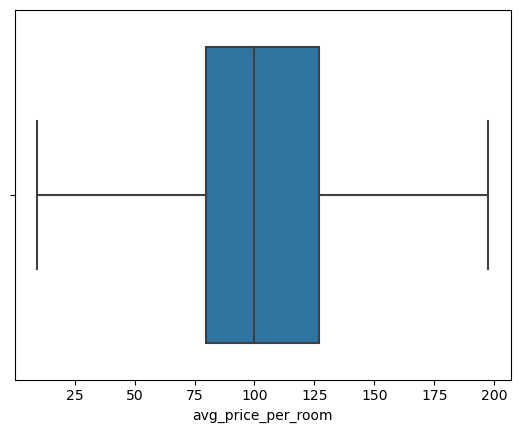

In [39]:
# After Treating Ourtliers
sns.boxplot(df['avg_price_per_room'],  orient='h')

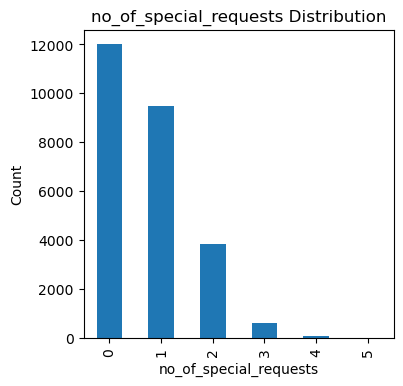

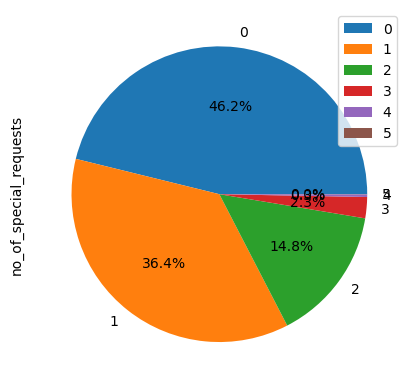

In [40]:



# counts of no_of_special_requests

value_counts =  df["no_of_special_requests"].value_counts()

plt.figure(figsize=(4,4))
value_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('no_of_special_requests')
plt.ylabel('Count')
plt.title('no_of_special_requests Distribution')

plt.show()
df["no_of_special_requests"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

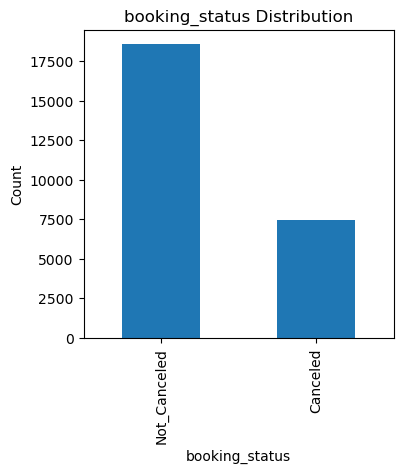

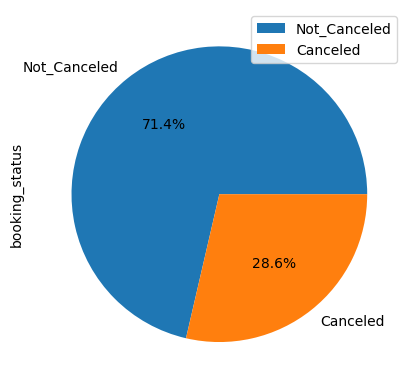

In [41]:




# counts of no_of_special_requests

value_counts =  df["booking_status"].value_counts()

plt.figure(figsize=(4,4))
value_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('booking_status')
plt.ylabel('Count')
plt.title('booking_status Distribution')

plt.show()
df["booking_status"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.legend()

## Bi - Variate Analysis

In [42]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

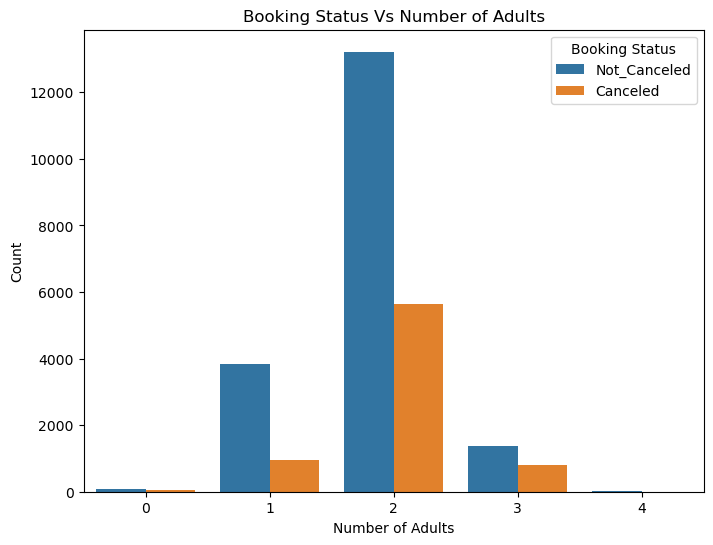

In [43]:
# Creating stacked bar plot for Adult Customers
plt.figure(figsize=(8, 6))
sns.countplot(x='no_of_adults', hue='booking_status', data=df)
plt.title('Booking Status Vs Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.show()

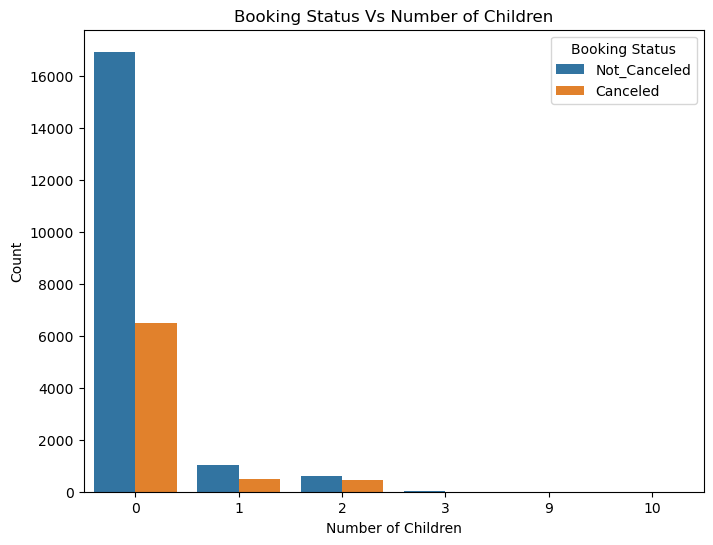

In [44]:
# Creating stacked bar plot for childrens
plt.figure(figsize=(8, 6))
sns.countplot(x='no_of_children', hue='booking_status', data=df)
plt.title('Booking Status Vs Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.show()

In [45]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

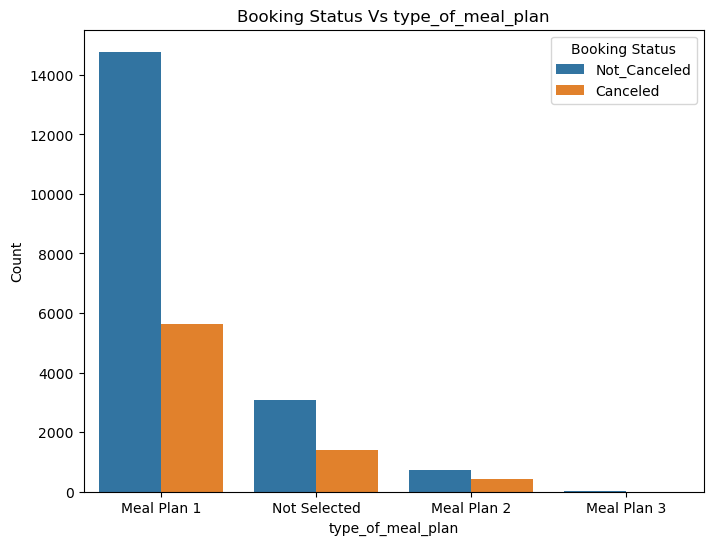

In [46]:
# Creating stacked bar plot for type_of_meal_plan
plt.figure(figsize=(8, 6))
sns.countplot(x='type_of_meal_plan', hue='booking_status', data=df)
plt.title('Booking Status Vs type_of_meal_plan')
plt.xlabel('type_of_meal_plan')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.show()

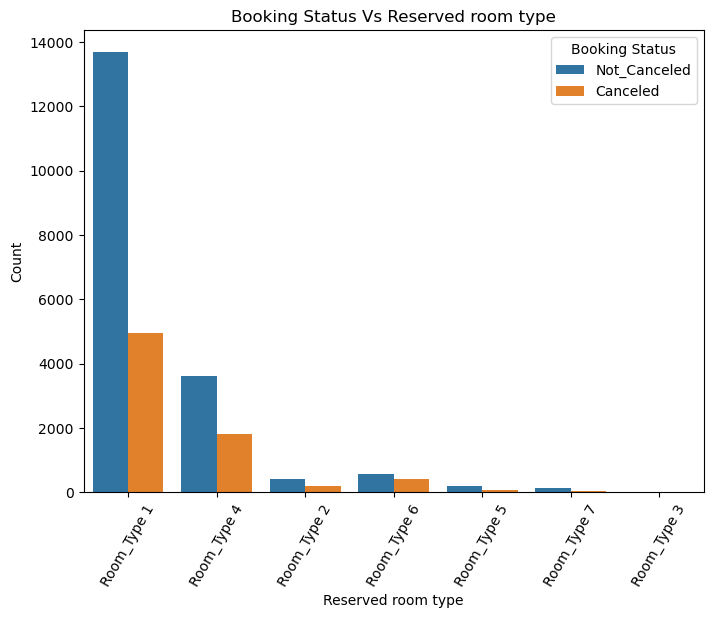

In [47]:
# Creating stacked bar plot for room_type_reserved
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)
plt.title('Booking Status Vs Reserved room type')
plt.xlabel('Reserved room type')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.xticks(rotation=60)
plt.show()

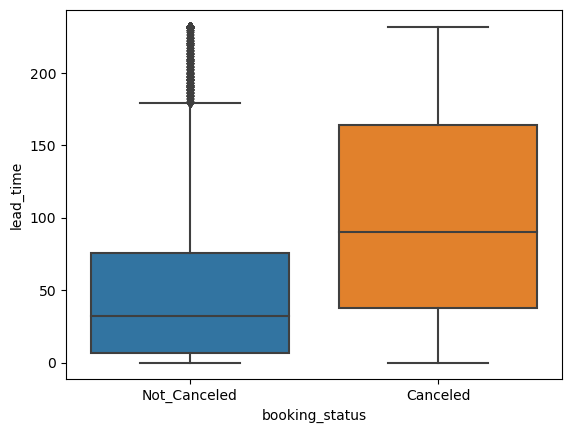

In [48]:
sns.boxplot(df["booking_status"],df["lead_time"])
plt.show()

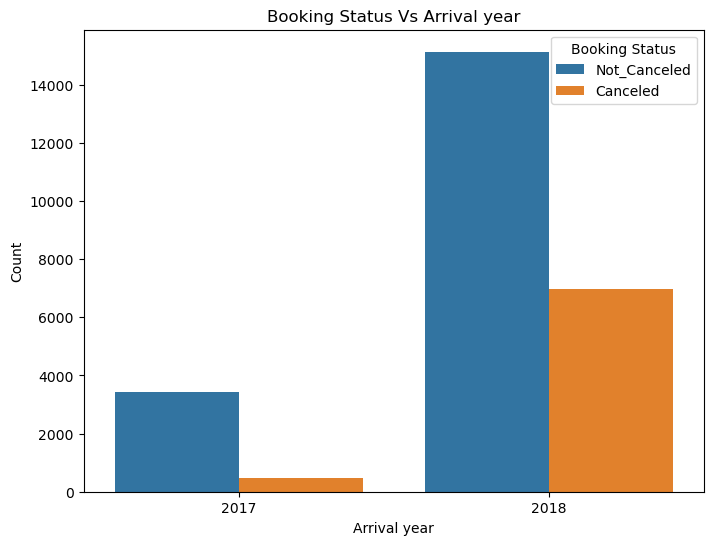

In [49]:
# Creating stacked bar plot for arrival_year
plt.figure(figsize=(8, 6))
sns.countplot(x='arrival_year', hue='booking_status', data=df)
plt.title('Booking Status Vs Arrival year')
plt.xlabel('Arrival year')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.show()

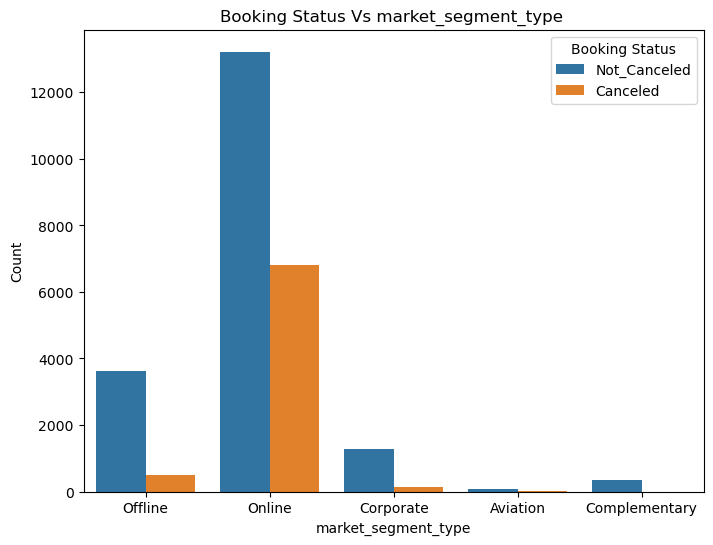

In [50]:
# Creating stacked bar plot for market_segment_type
plt.figure(figsize=(8, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Booking Status Vs market_segment_type ')
plt.xlabel('market_segment_type')
plt.ylabel('Count')
plt.legend(title='Booking Status', loc='upper right')
plt.show()

In [51]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

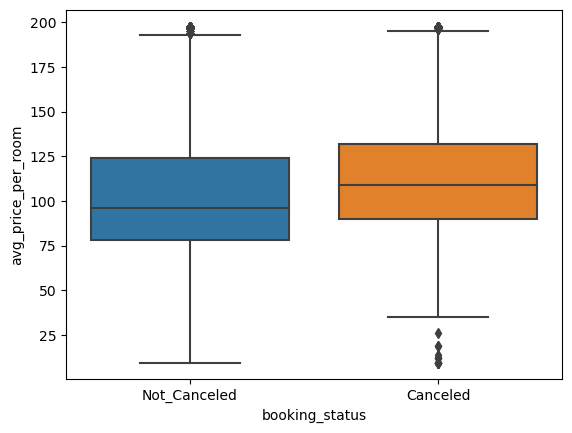

In [52]:
sns.boxplot(df["booking_status"],df["avg_price_per_room"])
plt.show()

In [53]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [54]:
a=[]
for i in df['booking_status']:
    print(i)
    if i =='Not_Canceled' :
        a.append("0")
    else:
        a.append(1)
df["booking_status"]=a

Not_Canceled
Not_Canceled
Canceled
Canceled
Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Not_Canceled
Canceled
Not_Canceled
Canceled
Canceled
Not_Canceled
Not_Canceled
Not_C

In [55]:
df["booking_status"]=df["booking_status"].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, INN00001 to INN36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  float64
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_seg

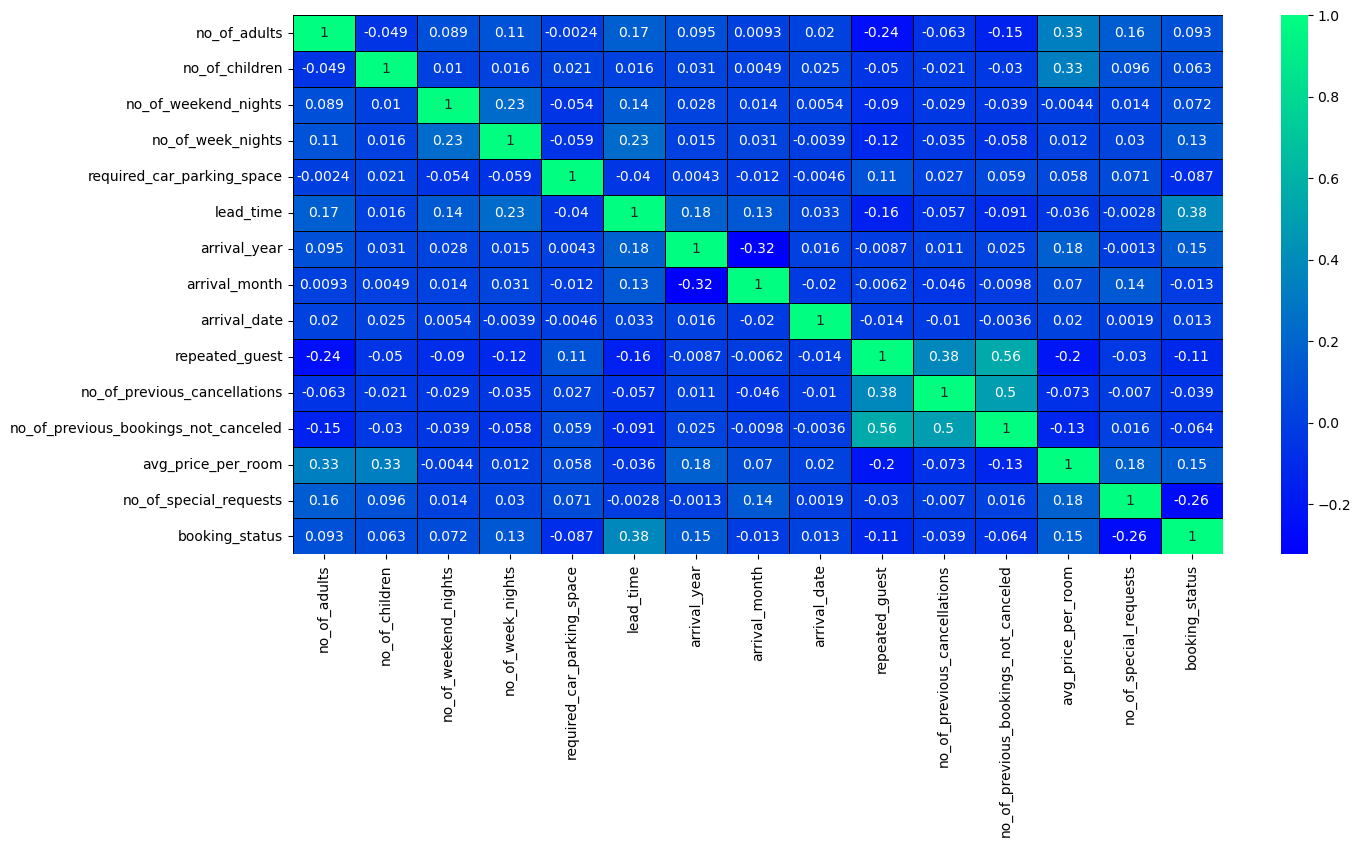

In [57]:
i=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(i, annot=True, linewidths=0.5,cmap='winter', linecolor='black');

In [58]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [59]:
df = df.drop(['required_car_parking_space',"arrival_month","repeated_guest","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","no_of_special_requests"], axis=1)

In [60]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_date', 'market_segment_type',
       'avg_price_per_room', 'booking_status'],
      dtype='object')

## Identifying input and output:

In [61]:
df1 = df.copy()

In [62]:
df1.shape

(26000, 12)

In [63]:
x = df1.drop(columns=['booking_status'])
y = df1.iloc[:,-1]

In [64]:
print(x.shape)
print(y.shape)

(26000, 11)
(26000,)


### Splitting the data into Train and Test

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20800, 11)
(20800,)
(5200, 11)
(5200,)


## Dividing categorical and Numerical features

In [68]:
# Train data
x_train_num = x_train.select_dtypes(include=['float64', 'int64','int32'])
x_train_cat = x_train.select_dtypes(include=['object'])
# Test data
x_test_num = x_test.select_dtypes(include=['float64', 'int64','int32'])
x_test_cat = x_test.select_dtypes(include=['object'])

In [69]:
print(x_train_num.shape)
print(x_train_cat.shape)
print(x_test_num.shape)
print(x_test_cat.shape)

(20800, 8)
(20800, 3)
(5200, 8)
(5200, 3)


## Rescaling input features

In [70]:
# Rescaling Numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# After the scalling column names will be lost 
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                         columns= x_train_num.columns,
                                         index = x_train_num.index)

In [71]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                        columns= x_test_num.columns,
                                        index = x_test_num.index)

In [72]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# Creating dataframe as columns will be in array format after OneHot Encoding
x_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(x_train_cat), 
                               columns=encoder.get_feature_names_out(x_train_cat.columns), 
                               index = x_train_cat.index)

In [73]:
# OneHotEncoding the (Nominal)categorical features

# Creating dataframe as columns will be in array format after OneHot Encoding
x_test_cat_OneEnc = pd.DataFrame(encoder.transform(x_test_cat), 
                               columns=encoder.get_feature_names_out(x_test_cat.columns), 
                               index = x_test_cat.index)

In [74]:
x_train_transformed = pd.concat([x_train_cat_OneEnc,x_train_num_rescaled],axis = 1)
x_test_transformed = pd.concat([x_test_cat_OneEnc,x_test_num_rescaled],axis = 1)

In [75]:
import imblearn



In [76]:
y_train.value_counts()

0    14895
1     5905
Name: booking_status, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE # SMOTE is a class


In [78]:
s=SMOTE()

In [79]:
x_train,y_train=s.fit_resample(x_train_transformed,y_train) 

In [80]:
y_train.value_counts()

0    14895
1    14895
Name: booking_status, dtype: int64

## Building Logical Structure

In [81]:
import keras
from keras import Sequential # creates network in sequential form
from keras.layers import Dense,Dropout,BatchNormalization,Input  # creates fully connected layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from keras.initializers import Zeros,Ones,glorot_normal,glorot_uniform,he_normal,he_uniform,random_uniform,random_normal 
import keras_tuner as kt

Using TensorFlow backend


##### Step-1: creating a fucntion

In [82]:
def best_model(hp):
    model=Sequential()
    model.add(Input(shape=(x_train_transformed.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),activation=hp.Choice("activation",values=["sigmoid","tanh","relu"]),kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
            
    model.add(Dense(1,activation="sigmoid"))
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adadelta'])
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer_choice, metrics=['accuracy'])
    return model 

#### Step-2: calling function using tuner()

In [84]:
tuner=kt.RandomSearch(best_model,objective="val_accuracy",max_trials=5,directory=r"C:\Users\admin\Full_ANN_proj\hotelchurn\models",project_name="f18")

In [85]:
x_train.shape 

(29790, 21)

In [86]:
y_train.shape 

(29790,)

### Step-3: Training

In [87]:
tuner.search(x_train,y_train,epochs=20,validation_data=(x_test_transformed,y_test))

Trial 5 Complete [00h 00m 55s]
val_accuracy: 0.7044230699539185

Best val_accuracy So Far: 0.7300000190734863
Total elapsed time: 00h 05m 33s


In [88]:
tuner.search_space_summary() 

Search space summary
Default search space size: 14
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1

In [89]:
tuner.results_summary() 

Results summary
Results in C:\Users\admin\Full_ANN_proj\hotelchurn\models\f18
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 12
activation: tanh
weight_init: glorot_uniform
neurons1: 14
neurons2: 1
neurons3: 9
neurons4: 3
optimizer: sgd
neurons5: 1
neurons6: 1
neurons7: 1
neurons8: 1
Score: 0.7300000190734863

Trial 1 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 3
activation: relu
weight_init: glorot_uniform
neurons1: 12
neurons2: 8
neurons3: 2
neurons4: 5
optimizer: rmsprop
neurons5: 11
neurons6: 14
neurons7: 12
neurons8: 14
neurons9: 1
Score: 0.7044230699539185

Trial 3 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 2
activation: relu
weight_init: he_uniform
neurons1: 8
neurons2: 1
neurons3: 6
neurons4: 6
optimizer: adadelta
neurons5: 13
neurons6: 15
neurons7: 4
neurons8: 3
neurons9: 5
Score: 0.7044230699539185

Trial 4 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 1
activation: sigmo

In [90]:
tuner.get_best_hyperparameters()[0].values 

{'hiddenlayers': 9,
 'neurons0': 12,
 'activation': 'tanh',
 'weight_init': 'glorot_uniform',
 'neurons1': 14,
 'neurons2': 1,
 'neurons3': 9,
 'neurons4': 3,
 'optimizer': 'sgd',
 'neurons5': 1,
 'neurons6': 1,
 'neurons7': 1,
 'neurons8': 1}

In [91]:
fmodel = tuner.get_best_models(num_models=1)[0] 

In [92]:
fmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                264       
                                                                 
 dense_1 (Dense)             (None, 14)                182       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
 dense_3 (Dense)             (None, 9)                 18        
                                                                 
 dense_4 (Dense)             (None, 3)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [93]:
hist=fmodel.fit(x_train_transformed,y_train,batch_size=20,epochs=20,validation_split=0.15) 

Epoch 1/20
884/884 [==============================] - 4s 3ms/step - loss: 0.4945 - accuracy: 0.7559 - val_loss: 0.4909 - val_accuracy: 0.7599
Epoch 2/20
884/884 [==============================] - 2s 3ms/step - loss: 0.4922 - accuracy: 0.7551 - val_loss: 0.5054 - val_accuracy: 0.7628
Epoch 3/20
884/884 [==============================] - 2s 3ms/step - loss: 0.4906 - accuracy: 0.7601 - val_loss: 0.4902 - val_accuracy: 0.7583
Epoch 4/20
884/884 [==============================] - 2s 3ms/step - loss: 0.4898 - accuracy: 0.7585 - val_loss: 0.4896 - val_accuracy: 0.7545
Epoch 5/20
884/884 [==============================] - 2s 3ms/step - loss: 0.4890 - accuracy: 0.7618 - val_loss: 0.4893 - val_accuracy: 0.7596
Epoch 6/20
884/884 [==============================] - 2s 3ms/step - loss: 0.4883 - accuracy: 0.7627 - val_loss: 0.4965 - val_accuracy: 0.7442
Epoch 7/20
884/884 [==============================] - 2s 3ms/step - loss: 0.4879 - accuracy: 0.7595 - val_loss: 0.4884 - val_accuracy: 0.7609
Epoch 

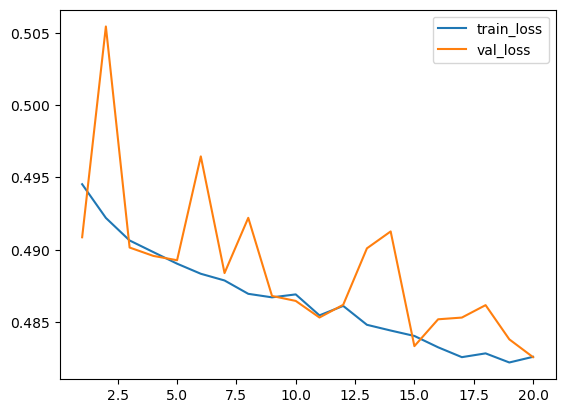

In [94]:
plt.plot(range(1,21),hist.history["loss"],label="train_loss")
plt.plot(range(1,21),hist.history["val_loss"],label="val_loss")
plt.legend()

In [95]:
hist.history['val_loss']

[0.49086886644363403,
 0.5054311156272888,
 0.4901600778102875,
 0.4895816445350647,
 0.48928260803222656,
 0.49645712971687317,
 0.4883963167667389,
 0.49221211671829224,
 0.4868147671222687,
 0.486472487449646,
 0.4853258430957794,
 0.48620253801345825,
 0.49010446667671204,
 0.49127209186553955,
 0.4833485782146454,
 0.4852031171321869,
 0.4853215217590332,
 0.48618075251579285,
 0.48381710052490234,
 0.4825868308544159]

In [96]:
predicted=fmodel.predict(x_test_transformed)

163/163 [==============================] - 1s 3ms/step


In [97]:
predicted=np.where(predicted>0.5,1,0)

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [99]:
print('accuracy:',accuracy_score(y_test,predicted))

accuracy: 0.749423076923077


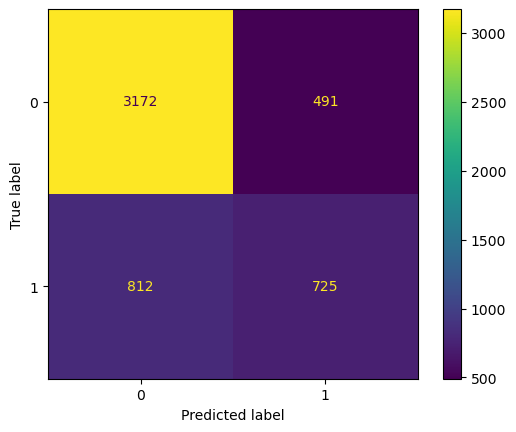

In [100]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()